<a href="https://colab.research.google.com/github/KeshavThosar/BasicProgrammingProblems/blob/master/Bell_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assigment 2 Part 2 
## Bell curve
---
Keshav Thosar  
2019120065  
EXTC

---



**Aim:** To create a bell curve based on the grade distribution of the tests of both branches and compare the result.  
**Procedure:** We would be using various python libraries for our assignment. We start by including them in the first cell.

In [101]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

First we extract all the data from the csv files. The files were created from the data that was provided in the Excel sheets

In [102]:
extc = pd.read_csv('extc.csv')
etrx = pd.read_csv('etrx.csv')
print('EXTC:\n', extc['Grade'], '\n')
print('ETRX:\n', etrx['Grade'], '\n')

EXTC:
 0     24.0
1     24.5
2     23.0
3     11.0
4     21.5
      ... 
64    23.0
65    25.5
66    20.0
67    21.5
68    21.8
Name: Grade, Length: 69, dtype: float64 

ETRX:
 0      5.5
1     10.0
2     11.0
3     13.0
4     13.0
      ... 
72    27.0
73    27.0
74    27.5
75    28.0
76    30.0
Name: Grade, Length: 77, dtype: float64 



# Scaling
We use sklearn's StandardScaler class to normalize the values.   
What we are essentially doing is for every *x* in the list we are scaling it as  
 *(x - u)/s*, where *u* is the mean and *s* is the standard deviation.

In [103]:
standardScalar = StandardScaler()

extc_normalized_grades = standardScalar.fit_transform(extc[['Grade']])
extc_std, extc_mean = np.sqrt(standardScalar.var_), standardScalar.mean_
print('EXTC \nMean: {}\nVariance: {}\n---------------------'.format(standardScalar.mean_[0], standardScalar.var_[0]))

etrx_normalized_grades = standardScalar.fit_transform(etrx[['Grade']])
etrx_std, etrx_mean = np.sqrt(standardScalar.var_), standardScalar.mean_
print('ETRX \nMean: {}\nVariance: {}\n---------------------'.format(standardScalar.mean_[0], standardScalar.var_[0]))


EXTC 
Mean: 21.83768115942029
Variance: 16.655391724427638
---------------------
ETRX 
Mean: 20.381818181818183
Variance: 18.59655253837072
---------------------


# Getting the PDF values
We put the normalised grades in the formula  
$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-u}{\sigma})^{2}}$

To get the normal distribution values

In [104]:
extc_pdf_values = 1/(extc_std*np.sqrt(2*np.pi)) * np.exp(-0.5*((extc_normalized_grades)**2))
etrx_pdf_values = 1/(etrx_std*np.sqrt(2*np.pi)) * np.exp(-0.5*((etrx_normalized_grades)**2))

# Plotting
Now that we have obtained all the values, we plot them as a scatter plot.

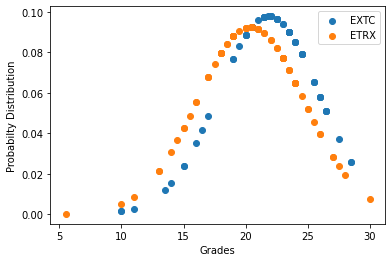

In [105]:
plt.scatter(extc['Grade'], extc_pdf_values)
plt.scatter(etrx['Grade'], etrx_pdf_values)
plt.legend(['EXTC', 'ETRX'])
plt.ylabel('Probabilty Distribution')
plt.xlabel('Grades')
plt.show()

**Observation:** 

|Branch| Mean | Variance |
---|-------|-----------
|EXTC |21.83768115942029| 16.655391724427638|
|ETRX |20.381818181818183|18.59655253837072|  

- A general conclusion could be that the average marks of
the EXTC department is higher than that of ETRX. 
- Furthermore, by comparing the value of variance, it was observed that the marks
were spaced out more about the average in case of EXTC.

**Conclusion:**  
With this assignment, we were able to successfully convert the grade sheets of two branches into a normal distribution. We used sklearn, numpy, pandas, scipy and malplotlib to aid us in finding the desired values and achieving the desired results.